In [28]:
import numpy as np
import pandas as pd
from numpy import unique
from numpy import where

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("data/data_nn.csv",  header=None)
target = pd.read_csv("data/target_nn.csv", header=None)

In [30]:
#print(data.head)
print("INFO data")
print(data.info(verbose=True))
print("INFO target")
print(target.info(verbose=True))

INFO data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 128 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
 12  12      float64
 13  13      float64
 14  14      float64
 15  15      float64
 16  16      float64
 17  17      float64
 18  18      float64
 19  19      float64
 20  20      float64
 21  21      float64
 22  22      float64
 23  23      float64
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      float64
 32  32      float64
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39  39      float64


In [31]:
# Data train into numpy
X = np.array(data.values)
print("INFO data train ndim ", X.ndim)
print("INFO data train shape ", X.shape)
# Data target into numpy
# y = np.array(target.values)
# y = le.fit_transform(y)
print("INFO data target ndim ", y.ndim)
print("INFO data target shape ", y.shape)

INFO data train ndim  2
INFO data train shape  (2451, 128)
INFO data target ndim  1
INFO data target shape  (2451,)


In [32]:
# Fake test data
# X_test = X_train
# y_test = y_train

# Real test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
print("X_train ", X_train)
print("y_train ", y_train)

X_train  [[-0.0596112   0.198477    0.04336901 ... -0.06669176 -0.03925764
   0.01610491]
 [-0.11727303  0.0231689   0.08422165 ... -0.10061531  0.1594163
  -0.00461703]
 [-0.14292495 -0.05878348 -0.19274202 ... -0.08546078  0.00791466
  -0.00877356]
 ...
 [-0.00416617  0.18676874  0.05907031 ... -0.06085141  0.00217127
   0.00182919]
 [-0.08671222  0.18246034  0.04816711 ... -0.06690136 -0.0569838
   0.02110024]
 [-0.06063903  0.06584607 -0.00863631 ... -0.07643281  0.19593012
   0.00532108]]
y_train  [1 3 2 ... 1 1 3]


In [8]:
# Supervised SVC parameter grid search
n_samples = len(X_train)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.036 (+/-0.004) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.036 (+/-0.004) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.969 (+/-0.114) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.036 (+/-0.004) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.971 (+/-0.116) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.969 (+/-0.114) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.971 (+/-0.116) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.971 (+/-0.116) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.971 (+/-0.116) for {'C': 1, 'kernel': 'linear'}
0.971 (+/-0.116) for {'C': 10, 'kernel': 'linear'}
0.971 (+/-0.116) for {'C': 100, 'kernel': 'linear'}
0.971 (+/-0.116) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed 

In [37]:
# Supervised PCA + SVC parameter grid search

pca = PCA(n_components=6)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
#clf = SVC()
#clf.fit(X_t_train, y_train)
#print 'score', clf.score(X_t_test, y_test)
#print 'pred label', clf.predict(X_t_test)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(probability=True), tuned_parameters, scoring='%s_macro' % score)
    clf.fit(X_t_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_t_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.036 (+/-0.004) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.036 (+/-0.004) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.968 (+/-0.115) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.036 (+/-0.004) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.969 (+/-0.114) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.968 (+/-0.115) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.971 (+/-0.116) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.969 (+/-0.114) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.971 (+/-0.116) for {'C': 1, 'kernel': 'linear'}
0.971 (+/-0.116) for {'C': 10, 'kernel': 'linear'}
0.971 (+/-0.116) for {'C': 100, 'kernel': 'linear'}
0.971 (+/-0.116) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed

In [38]:
# Predict proba
y_true, y_pred = y_test, clf.predict_proba(X_t_test)
print( y_pred )

[[4.88065715e-03 6.97650093e-04 2.71323392e-04 ... 2.08567995e-03
  9.86280346e-04 6.85844114e-04]
 [3.56556254e-03 2.12581456e-03 3.03333115e-04 ... 4.13112310e-04
  6.89389124e-04 7.03785369e-04]
 [1.03266587e-03 9.90934335e-01 1.75249039e-03 ... 7.13963345e-04
  9.23104454e-04 5.76754468e-04]
 ...
 [1.93864595e-03 1.05879691e-03 9.87569976e-01 ... 5.65388638e-04
  4.78809411e-03 4.52080831e-04]
 [2.46030999e-03 1.83541852e-03 1.40788180e-03 ... 9.85034163e-01
  2.34764822e-03 1.51911820e-03]
 [1.10836036e-03 9.89585545e-01 1.90478624e-03 ... 1.02952516e-03
  1.21647795e-03 3.38654776e-04]]


Estimated number of clusters: 6
Estimated number of noise points: 34
Silhouette Coefficient: 0.521
Estimated clusters  [0 3 1 ... 0 0 3]


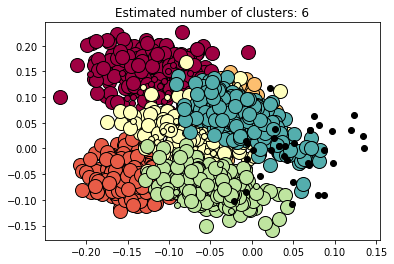

In [9]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.7, min_samples=100).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_train, labels))
print('Estimated clusters ', labels)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_train[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_train[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

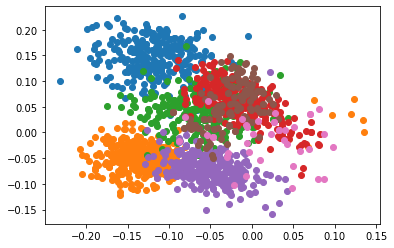

In [10]:
# BIRCH
from sklearn.cluster import Birch

# define the model
model = Birch(threshold=0.1, n_clusters=7)
# fit the model
model.fit(X_train)
# assign a cluster to each example
yhat = model.predict(X_train)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1])
# show the plot
plt.show()

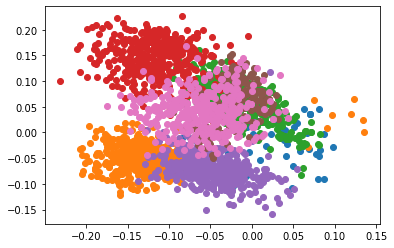

In [11]:
# Kmeans
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define the model
model = KMeans(n_clusters=7)
# fit the model
model.fit(X_train)
# assign a cluster to each example
yhat = model.predict(X_train)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X_train[row_ix, 0], X_train[row_ix, 1])
# show the plot
pyplot.show()

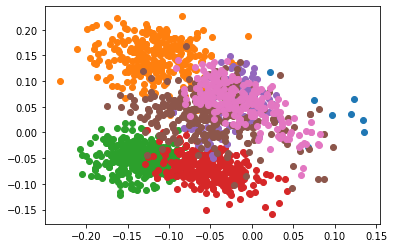

In [13]:
# optics clustering
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define the model
model = OPTICS(eps=0.8, min_samples=100)
# fit model and predict clusters
yhat = model.fit_predict(X_train)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X_train[row_ix, 0], X_train[row_ix, 1])
# show the plot
pyplot.show()

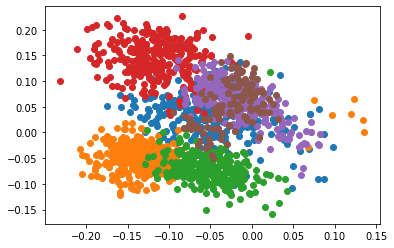

In [14]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components=6)
# fit the model
model.fit(X_train)
# assign a cluster to each example
yhat = model.predict(X_train)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X_train[row_ix, 0], X_train[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
"""
Feature Selection is a technique which is used when we you know the target variable(Supervised Learning)
When we talk with respect to Unsupervised Learning, there is no exact technique which could do that. But there is something which can help us in those lines i.e., Dimensionality Reduction, this technique is used to reduce the number of features and give us the features which explains the most about the dataset. The features would be derived from the existing features and might or might not be the same features.
There are different techniques which are available for doing so:

# PCA
# Linear discriminant analysis
Non-negative Matrix Factorization
Generalized discriminant analysis and many more.
The outcome of Feature Selection would be the same features which explain the most with respect to the target variable but the outcome of the Dimensionality Reduction might or might not be the same features as these are derived from the given input.
"""


Projecting 128-dimensional data to 2D


Text(0.5, 1.0, ' PCA projection')

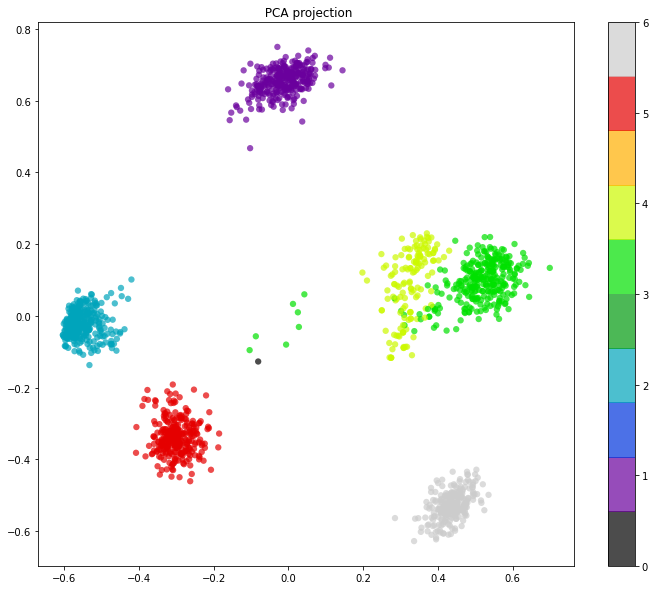

In [27]:
# PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=6)
X_reduced = pca.fit_transform(X_train)

print('Projecting %d-dimensional data to 2D' % X_train.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, label=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title(' PCA projection')

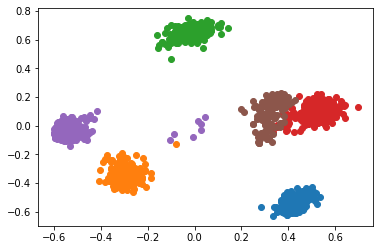

[1 3 1 ... 2 2 3]


In [25]:
# gaussian mixture clustering after PCA
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components=6)
# fit the model
model.fit(X_reduced)
# assign a cluster to each example
yhat = model.predict(X_reduced)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X_reduced[row_ix, 0], X_reduced[row_ix, 1])
# show the plot
pyplot.show()
print(yhat[100:])